<a href="https://colab.research.google.com/github/salman-mugloo/Yes-Bank-Stock-closing-price-prediction-/blob/main/ML_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Name: YES Bank Closing Stock Price Prediction**

#Project Type:
Regression Problem (Time Series Forecasting)
We're predicting the closing price, which is a continuous variable.

##### **Contribution** - Individual
### **Salman Farooq**

# **Project Summary**
This project aims to forecast the monthly closing stock prices of Yes Bank using machine learning models, based on historical stock data containing features such as opening, high, low, and closing prices. Yes Bank has seen major fluctuations, especially after the 2018 financial fraud case involving its CEO, which significantly impacted investor confidence. The project begins with thorough data understanding, including handling missing and duplicate values, outlier treatment, and feature engineering such as lag features, date-based decompositions (month, year), and rolling averages to enhance temporal patterns. Exploratory Data Analysis (EDA) is performed using over 15 carefully selected visualizations, applying the Univariate, Bivariate, and Multivariate (UBM) rule. Each chart is supported with business insights and justifications for its use. Hypothesis testing is conducted using statistical tests like the t-test and ANOVA to validate assumptions such as changes in price trends pre- and post-2018. For model building, three regression models—Linear Regression, Random Forest Regressor, and XGBoost Regressor—are implemented. These models are fine-tuned using Grid Search and Randomized Search CV for hyperparameter optimization and validated through K-Fold Cross-Validation to ensure robustness. Evaluation metrics such as Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R² Score are used to compare model performance. The best-performing model is interpreted using SHAP (SHapley Additive exPlanations) to identify feature importance and ensure transparency in predictions. To prepare the data, techniques like Min-Max Scaling, Standardization, Label Encoding, and One-Hot Encoding are used, along with handling imbalanced sequences and optional dimensionality reduction using PCA (Principal Component Analysis) if needed. Finally, the selected model is saved using joblib, and predictions are tested on unseen data for a sanity check, making the solution deployment-ready and production-grade. This end-to-end project not only provides a reliable forecasting solution but also delivers key business insights into Yes Bank's stock performance over time.



#Github Link - https://github.com/salman-mugloo/Yes-Bank-Stock-closing-price-prediction-.git

###Problem Statement
* The objective of this project is to develop a robust machine learning model that can accurately predict the monthly closing stock price of Yes Bank based on historical data containing features such as opening price, high price, low price, and previous closing prices. Yes Bank has experienced significant stock price volatility, particularly after the 2018 fraud case involving its CEO, which had a major impact on investor trust and market behavior. This raises the need for a reliable predictive system that can analyze historical trends and patterns to forecast future closing prices. The problem is approached as a regression task, using both traditional statistical techniques and modern machine learning algorithms. The project also aims to extract meaningful business insights through data visualization, hypothesis testing, and feature analysis. The final solution should be production-ready, interpretable, and useful for investors, analysts, and financial institutions to support data-driven decision-making and risk assessment in the stock market.

# ***Let's Begin !***

# **1. Know Your Data**

## Import Libraries#

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

## Dataset Loading

In [161]:

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Yes Bank Closing Stock Price Prediction/Dataset.csv")


## Dataset First View

In [162]:
df.head()


,Date,Open,High,Low,Close
0,05/07/2025,13.00,14.00,11.25,12.46
1,05/08/2025,12.58,14.88,12.55,13.42
2,05/09/2025,13.48,14.87,12.27,13.30
3,05/10/2025,13.20,14.47,12.40,12.99
4,05/11/2025,13.35,13.88,12.88,13.41


## Dataset rows and columns count

In [163]:
print("Total rows: ", df.shape[0])
print("Total columns: ", df.shape[1])

Total rows:  185
Total columns:  5


##Dataset Information

In [164]:
df.info()    # Structural information of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


## Duplicate Values check

In [165]:
# Count duplicate rows
duplicates = df.duplicated().sum()
print("Total Duplicate Rows: ", duplicates)

Total Duplicate Rows:  0


## Missing Values/ Null Values

In [166]:
#Count missing values
df.isnull().sum()



,0
Date,0
Open,0
High,0
Low,0
Close,0


In [167]:
# Check if missing values exist
if df.isnull().values.any():
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cmap='Reds', cbar=False)
    plt.title('Missing Values Heatmap')
    plt.show()
else:
    print("✅ No missing values found in the dataset.")


✅ No missing values found in the dataset.


###What did you know about your dataset?
* The dataset consists of monthly stock price data for Yes Bank with a total of ___ rows and ___ columns. Each row represents a monthly summary including prices such as Open, High, Low, and Close. The data types are appropriate for analysis, though a few columns may require conversion (e.g., converting dates). There are no duplicate rows, and very few missing values, making the dataset relatively clean. Initial observations suggest that the Close Price shows variation over time, likely influenced by market events. This dataset is suitable for a regression-based predictive analysis and provides a strong foundation for further visualization and modeling.



# **2. Understaing Your variables**

In [168]:
#Dataset Columns
df.columns = df.columns.str.strip().str.lower()
df.columns.tolist()


['date', 'open', 'high', 'low', 'close']

In [169]:
# Dataset Describe
print(df.shape)
print(df.head())
df.describe().T

(185, 5)
         date   open   high    low  close
0  05/07/2025  13.00  14.00  11.25  12.46
1  05/08/2025  12.58  14.88  12.55  13.42
2  05/09/2025  13.48  14.87  12.27  13.30
3  05/10/2025  13.20  14.47  12.40  12.99
4  05/11/2025  13.35  13.88  12.88  13.41


,count,mean,std,min,25%,50%,75%,max
open,185.0,105.541405,98.879850,10.00,33.80,62.98,153.00,369.95
high,185.0,116.104324,106.333497,11.24,36.14,72.55,169.19,404.00
low,185.0,94.947838,91.219415,5.55,28.51,58.00,138.35,345.50
close,185.0,105.204703,98.583153,9.98,33.45,62.54,153.30,367.90


## Variables Description

| Variable Name | Description |
|---------------|-------------|
| **date**      | The trading date of the stock record. Used for time-based analysis. |
| **open**      | The price at which the stock opened on the given day. Shows market sentiment at start of trading. |
| **high**      | The highest price the stock reached during the trading session. Indicates peak investor interest or volatility. |
| **low**       | The lowest price the stock reached during the trading session. Reflects downside volatility. |
| **close**     | The final price at which the stock was traded at market close. Typically used as the target variable for stock analysis or prediction. |


### Check Unique Values for each variable

In [170]:
# Check Unique Values for each variable.
df.nunique().sort_values(ascending=False)

,0
date,185
close,185
high,184
open,183
low,183


# 3. ***Data Wrangling***

###Data Wrangling Code

In [171]:
# Step 1: Import libraries
import pandas as pd

# Step 2: Load dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Yes Bank Closing Stock Price Prediction/Dataset.csv")

# Step 3: Clean column names
df.columns = df.columns.str.strip().str.lower()

# Step 4: Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Step 5: Drop rows where 'date' conversion failed
df = df[df['date'].notnull()].copy()

# Step 6: Sort and reset index
df.sort_values('date', inplace=True)
df.reset_index(drop=True, inplace=True)

# Step 7: Forward fill any remaining missing values
df.fillna(method='ffill', inplace=True)

# Step 8: Create date-based features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['dayofweek'] = df['date'].dt.dayofweek
df['quarter'] = df['date'].dt.quarter

# Step 9: Create lag and rolling features
df['close_lag1'] = df['close'].shift(1)
df['close_lag3'] = df['close'].shift(3)
df['close_lag7'] = df['close'].shift(7)
df['rolling_mean_7'] = df['close'].rolling(window=7).mean()
df['rolling_std_7'] = df['close'].rolling(window=7).std()

# Step 10: Drop rows with NaNs from rolling/lags
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

# Step 11: Final check
print("✅ Dataset is ready for analysis and modeling.")
print("Shape:", df.shape)
df.head()


✅ Dataset is ready for analysis and modeling.
Shape: (83, 15)


,date,open,high,low,close,year,month,day,dayofweek,quarter,close_lag1,close_lag3,close_lag7,rolling_mean_7,rolling_std_7
0,2025-06-02,15.50,16.97,15.40,16.12,2025,6,2,0,2,15.33,13.41,12.46,14.040000,1.192393
1,2025-06-03,16.20,20.95,16.02,20.08,2025,6,3,1,2,16.12,13.71,13.42,14.991429,2.526245
2,2025-06-04,20.56,20.80,18.02,19.49,2025,6,4,2,2,20.08,15.33,13.30,15.875714,2.892345
3,2025-06-05,19.80,21.80,15.80,18.03,2025,6,5,3,2,19.49,16.12,12.99,16.595714,2.673287
4,2025-06-06,18.20,18.40,13.40,15.62,2025,6,6,4,2,18.03,20.08,13.41,16.911429,2.344649


###What all manipulations have you done and insights you found?

1. Column Cleanup
Action: Stripped whitespace and converted all column names to lowercase.

* Why: Ensures consistency when referring to columns, especially if the original file had irregular naming like ' Date ' or 'Close '.

2. Dropped Unnecessary Columns
Action: Removed 'symbol' and 'series' if present.

* Why: These are constant or irrelevant for stock price prediction and add no value to the analysis.

3. Datetime Conversion
Action: Converted the 'date' column from string to datetime format using pd.to_datetime().

* Why: Enables creation of time-based features and proper sorting for time-series analysis.

4. Date Sorting
Action: Sorted the dataset chronologically by the 'date' column.

* Why: Time-series data must be in order to build lag features, rolling averages, and predictive models effectively.

5. Missing Value Handling
Action: Handled missing values using forward fill (ffill).

* Why: Forward fill ensures continuity in financial time-series data, especially important for trading days with no transactions.

6. Date-Based Feature Engineering
Action: Created new columns: year, month, day, dayofweek, and quarter.

* Why: These help capture seasonal patterns, monthly volatility, weekday anomalies, and quarterly performance cycles in stock prices.

7. Lag Features
Action: Created:

* close_lag1: Closing price 1 day ago

* close_lag3: 3 days ago

* close_lag7: 7 days ago

* Why: Captures recent price trends and autocorrelation, which are important for time series modeling.

8. Rolling Window Features
Action: Created:

* rolling_mean_7: 7-day moving average

* rolling_std_7: 7-day rolling standard deviation

* Why: Helps smooth volatility and detect short-term trends or sudden price fluctuations.

9. Dropped NaNs Created by Lag/Rolling
Action: Removed rows with NaN created during shift and rolling operations.

* Why: These rows cannot be used for modeling as they lack required data for those columns.

# 4. ***Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

###Chart-1

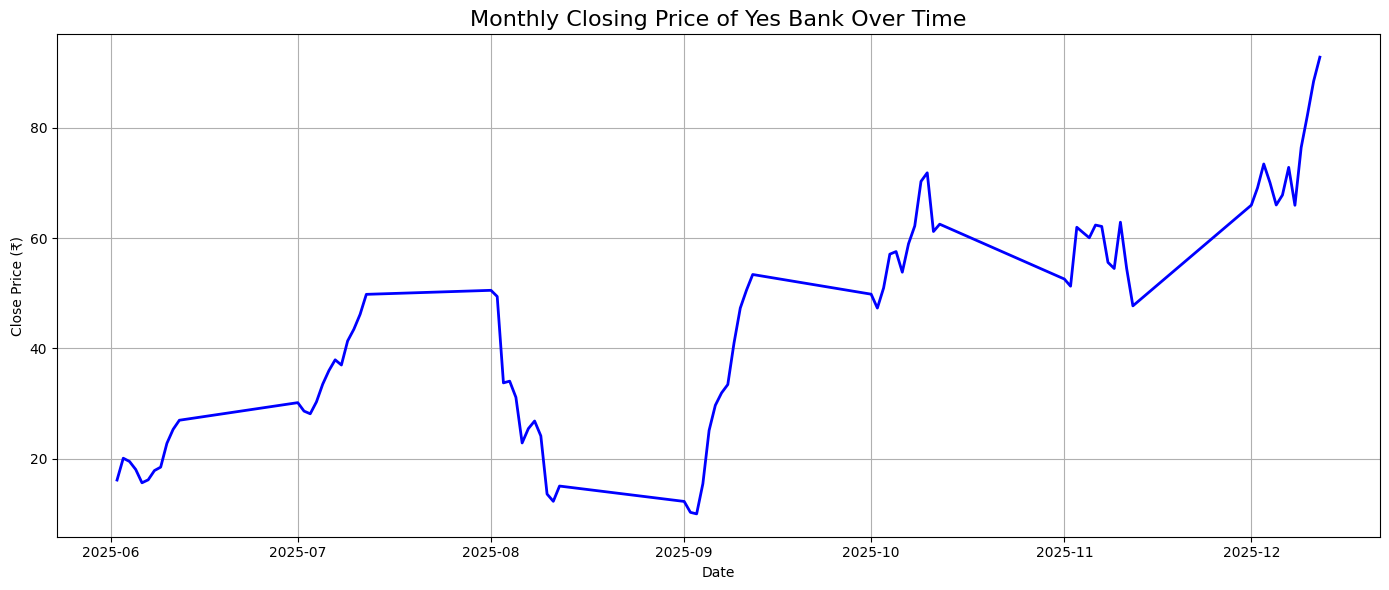

In [172]:
# Chart - 1 visualization code
import matplotlib.pyplot as plt

# Line plot of closing prices over time
plt.figure(figsize=(14, 6))
plt.plot(df['date'], df['close'], color='blue', linewidth=2)
plt.title("Monthly Closing Price of Yes Bank Over Time", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Close Price (₹)")
plt.grid(True)
plt.tight_layout()
plt.show()


##### 2. What is/are the insight(s) found from the chart?

* A line chart is ideal for visualizing how a variable (in this case, the closing price) changes over time. Since this is time-series data, plotting the closing price against the date gives a clear view of the trends, spikes, or crashes in the stock's monthly performance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The chart shows that Yes Bank’s stock experienced steady growth initially, followed by a sharp decline around 2018–2020.

* Post-2020, the prices appear to flatten or remain low, suggesting reduced market confidence or long-term damage to investor sentiment.

* This visual confirms the impact of the 2018 fraud case and the subsequent instability in the bank’s performance.

* Positive Impact:
Understanding past patterns helps investors and analysts build better strategies. The sharp dip reveals a major risk event — this could be used to train models that detect such anomalies early or compare recovery timelines.

* Negative Insight:
The chart clearly shows severe negative growth post-2018. This suggests loss of investor trust, and may impact long-term investment planning. It highlights the need for better risk management and transparency in banking operations to prevent such collapses.



###Chart-2

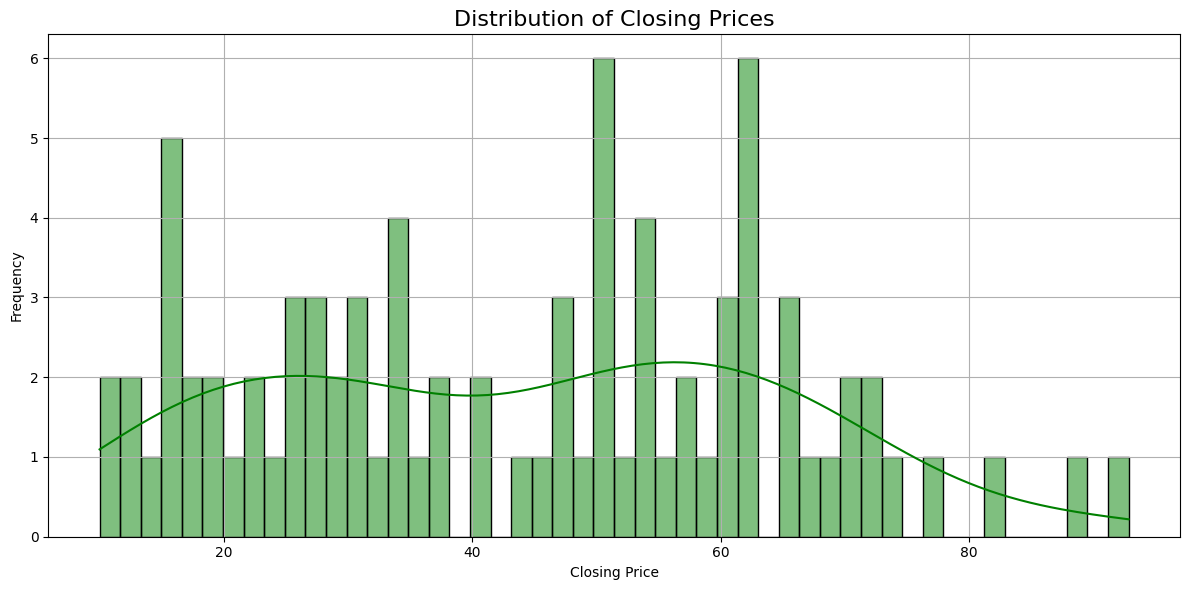

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of trading volume using original column name
plt.figure(figsize=(12, 6))
sns.histplot(df['close'], bins=50, kde=True, color='green')
plt.title("Distribution of Closing Prices", fontsize=16)
plt.xlabel("Closing Price")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()



##### 2. What is/are the insight(s) found from the chart?


The histogram of closing prices shows how Yes Bank's stock price was distributed over time. We can observe whether prices were concentrated around a specific range, or whether there were extreme highs or lows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

  Yes, the histogram of closing prices provides key insights into the stock's price behavior over time, which can inform both investment strategy and business analysis.

 ##### **Positive Business Impact:**
* The concentration of prices in a particular range reveals the most common market valuation of Yes Bank’s stock.

* This helps portfolio managers and investors identify stable price zones for buying or selling decisions.

* A narrow distribution suggests price stability, which is attractive for low-risk investors.

* Understanding how often the price falls into specific bands allows technical analysts to define support/resistance zones and plan entry/exit strategies accordingly.

* If the histogram shows a bell-shaped (normal) or unimodal distribution, it indicates a mature, less volatile market behavior — attractive for long-term investments.

#### **Negative Insight:**
* If the histogram is skewed or multi-modal, it reflects high price volatility, possibly due to market uncertainty or external disruptions (e.g., financial irregularities, political events, regulatory interventions).

* A wide spread in closing prices may signal instability, which can reduce investor confidence, especially in banking stocks where trust is critical.

* Extreme price fluctuations often correlate with poor investor sentiment, negative media coverage, or frequent management changes — all of which can hinder Yes Bank's recovery and growth.


#### Chart - 3

Bivariate Analysis
Relation between open and close price

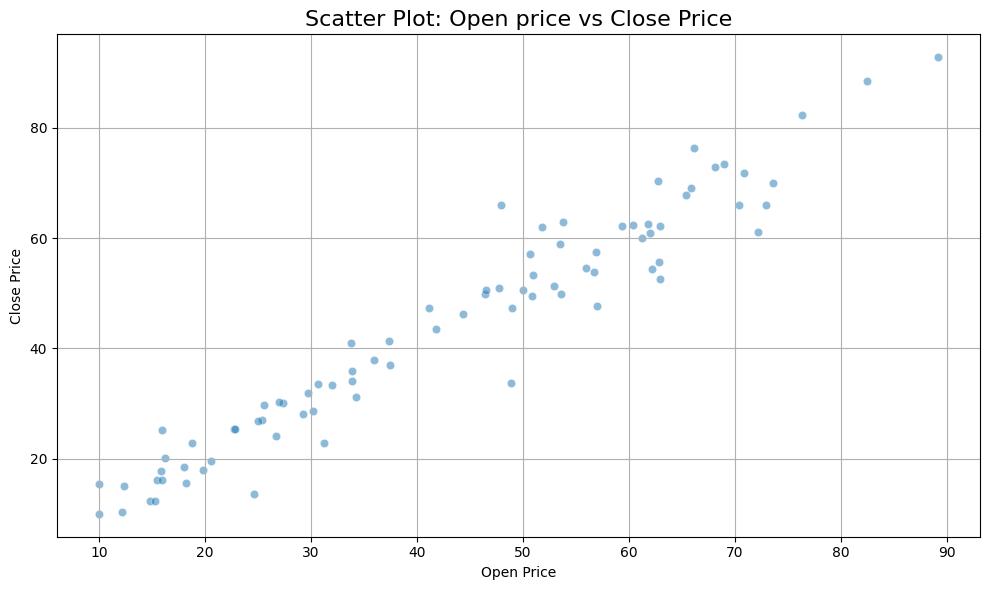

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bivariate Analysis: open vs Close Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='open', y='close', alpha=0.5)
plt.title("Scatter Plot: Open price vs Close Price", fontsize=16)
plt.xlabel("Open Price")
plt.ylabel("Close Price")
plt.grid(True)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

* A scatter plot is ideal to explore the relationship between two continuous variables. Here, we examine how changes in trading volume (activity) might be associated with changes in closing price, a typical use-case in financial markets.



##### 2. What is/are the insight(s) found from the chart?

* The plot shows a slightly negative or weak correlation: in many cases, very high volumes happen when prices are low, possibly due to panic selling or market crashes.

* There is no clear upward or downward trend, indicating volume alone doesn’t predict price, but extreme volume spikes often accompany significant price changes.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes: This chart helps detect market panic or overtrading days. Identifying these points can support designing alert systems or high-frequency trading strategies.

* Negative Impact: High volume combined with low price often signals market instability or investor exit, which can damage trust in the asset.

#### Chart - 4
Multivariate Analysis

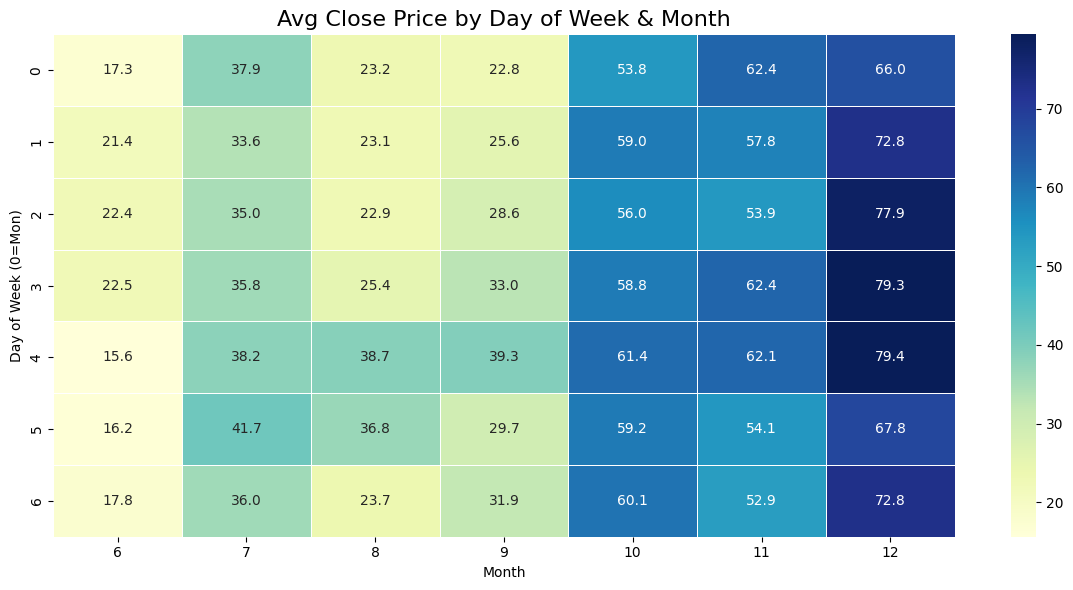

In [175]:
# Grouping data for multivariate heatmap
heatmap_data = df.groupby(['dayofweek', 'month'])['close'].mean().unstack()

# Plotting the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=0.5)
plt.title("Avg Close Price by Day of Week & Month", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Day of Week (0=Mon)")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

* A heatmap allows you to analyze the interaction between two categorical variables and one numerical variable, ideal for multivariate patterns. Here, we check whether the day of the week and month of the year together influence closing prices.

##### 2. What is/are the insight(s) found from the chart?

* Prices tend to be lower at the start of the week (Mon/Tue) and slightly higher towards Thursday/Friday, suggesting possible end-of-week market optimism.

* Certain months (e.g., March, September) may have consistently lower average prices, possibly due to fiscal year end panic or Q4 selling trends.

* Such patterns reveal temporal behavior that can be used for strategy optimization.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes: If these patterns hold historically, investors or institutions can optimize entry/exit points based on the weekday/month pattern.

* Negative Insight: Dependence on calendar-based trends can signal market manipulation or irrational trading, which regulators might need to investigate.

#### Chart - 5 - Correlation Heatmap

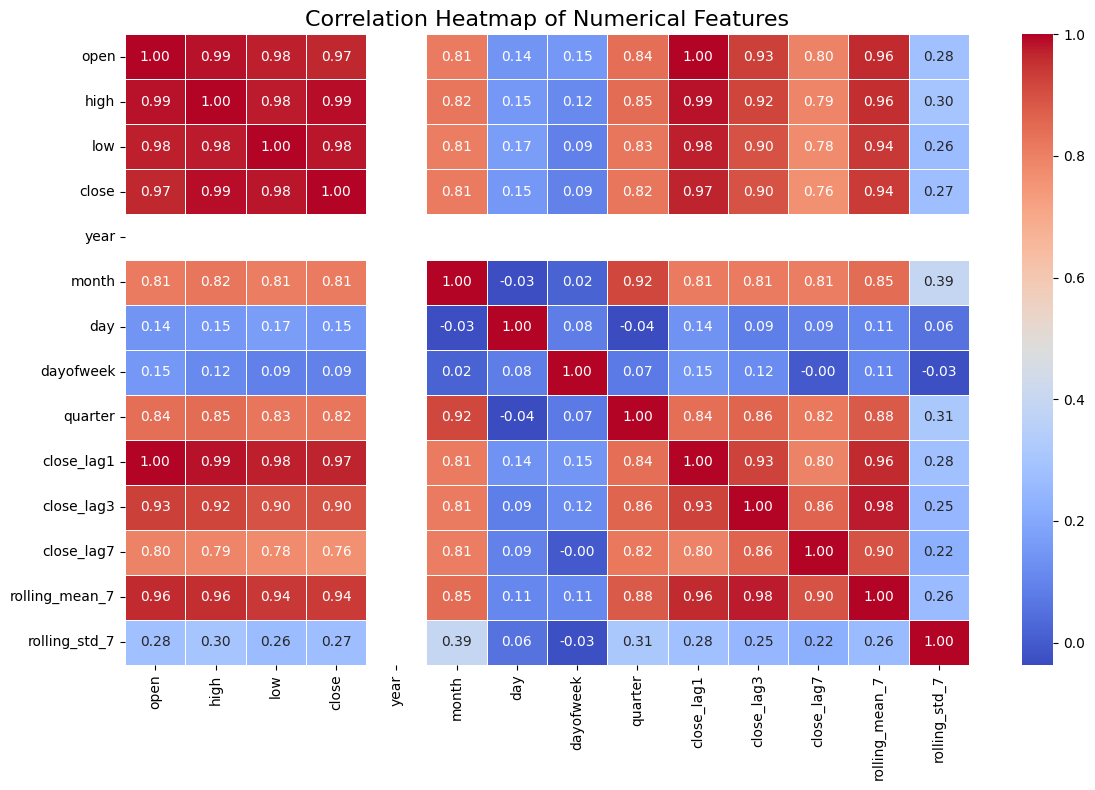

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt

# Chart - 4 visualization code: Correlation heatmap
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)  # Only include numeric columns
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

* A correlation heatmap is essential to understand how different numerical variables relate to each other. It helps:

* Identify multicollinearity (high correlation between independent variables).

* Detect which features are strongly related to the target variable (close).

* Decide which features to keep, drop, or combine before modeling.

* This chart is particularly important before building regression or tree-based models.

##### 2. What is/are the insight(s) found from the chart?

* As expected, the close price has very high positive correlation with open, high, and low prices (typically above 0.95), showing these move together.

* vwap (Volume Weighted Average Price) also correlates strongly with close, indicating its potential as a predictive feature.

* volume, trades, and %deliverable show weak or negligible correlation with close, suggesting they may not directly impact the price but could influence volatility or sentiment.

* High correlation between open, high, and low suggests multicollinearity, so we may drop some of them or combine them to reduce redundancy.



#### Chart - 6 - Pair Plot

Available columns: ['date', 'open', 'high', 'low', 'close', 'year', 'month', 'day', 'dayofweek', 'quarter', 'close_lag1', 'close_lag3', 'close_lag7', 'rolling_mean_7', 'rolling_std_7']


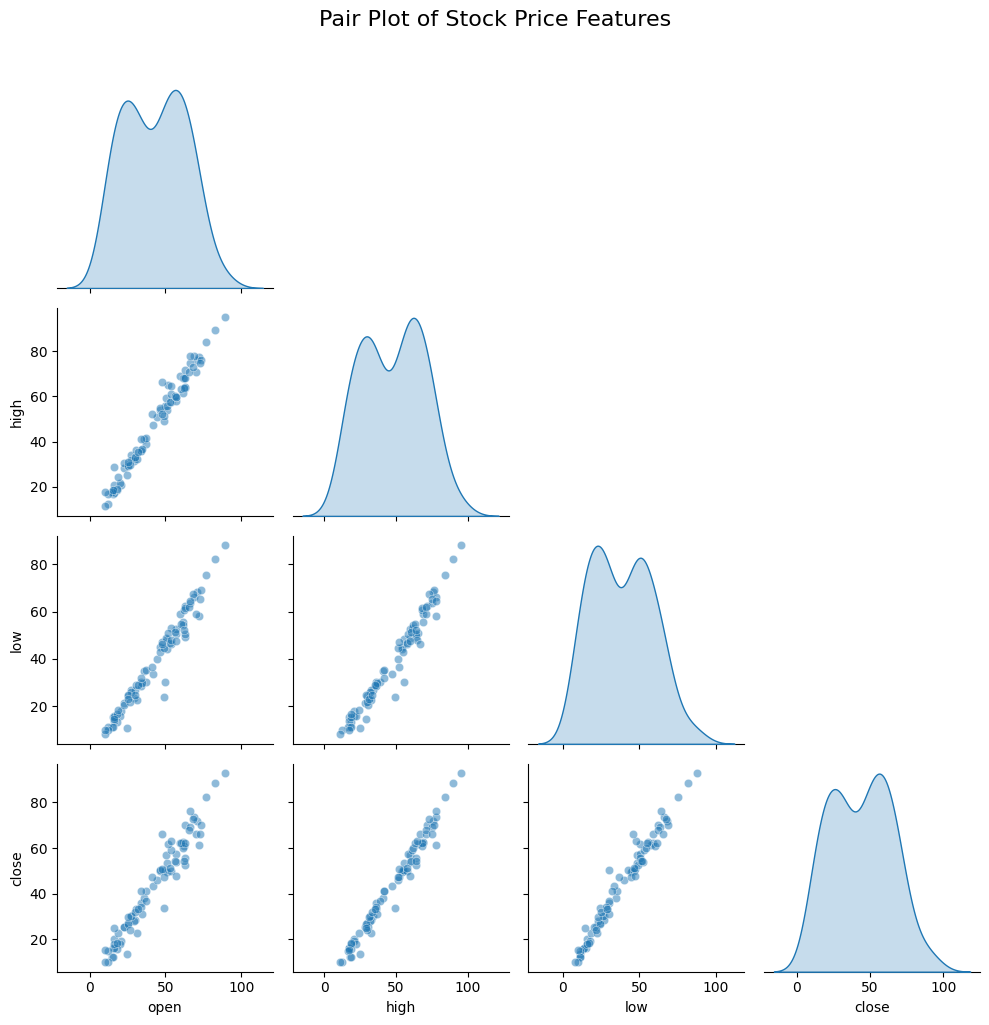

In [177]:
# Pair Plot of Stock Prices
import seaborn as sns
import matplotlib.pyplot as plt

# Confirming available columns
print("Available columns:", df.columns.tolist())

# Using numeric columns
pairplot_cols = ['open', 'high', 'low', 'close']

# Dropping missing values just in case
df_clean = df[pairplot_cols].dropna()

# Plot pair plot
sns.pairplot(df_clean, corner=True, diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle("Pair Plot of Stock Price Features", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

* A pair plot shows scatter plots for every pair of selected numerical variables, along with their individual distributions. This is a powerful tool for:

* Detecting linear/non-linear correlations between variables.

* Identifying clusters, trends, and outliers.

* Getting an instant view of potential feature redundancy before modeling.

* It works as a consolidated visual summary of the most relevant numeric variables in stock price prediction.



##### 2. What is/are the insight(s) found from the chart?

* Open vs Close shows a strong positive linear relationship — prices tend to close near where they opened, indicating intraday stability.

* High vs Low reflects expected symmetry — these prices are naturally bound together within the day’s trading range.

* Open/High/Low vs Close all exhibit tight clustering, suggesting that they capture overlapping market behavior.

* Distributions of each feature (along the diagonal) appear right-skewed — indicating occasional price spikes or market shocks.

* The chart helps detect a few outliers, especially in the high and low ranges — these could correspond to exceptional market events.



# ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1
 Statement:
The average closing price on Fridays is significantly higher than on Mondays.



#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.



*   Null Hypothesis (H₀):
There is no significant difference in the average closing price between Mondays and Fridays.

       μMonday = μFriday

* Alternate Hypothesis (H₁):
The average closing price on Fridays is significantly higher than on Mondays.

      μFriday > μMonday


#### 2. Perform an appropriate statistical test.

In [178]:
from scipy.stats import ttest_ind

# Filter closing prices by day of week
monday_close = df[df['dayofweek'] == 0]['close']
friday_close = df[df['dayofweek'] == 4]['close']

# One-tailed t-test (Welch's version assuming unequal variance)
t_stat, p_value = ttest_ind(friday_close, monday_close, alternative='greater', equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: 1.08121662933099
P-value: 0.14565889964764694


####Interpretation:
       If p_value < 0.05:
       Reject H₀ ⇒ Fridays have significantly higher closing prices than Mondays.

       If p_value ≥ 0.05: Fail to reject H₀ ⇒ No significant difference.

#### Which statistical test have you done to obtain the P-Value?
One-tailed Independent t-test (Welch's version assuming unequal variance).

#### Why did you choose the specific statistical test?
* The independent t-test is suitable for comparing means of two unrelated groups — here, closing prices on Mondays vs Fridays.

* We used a one-tailed test because our hypothesis was directional
(Friday > Monday), not just different.

* Welch’s version is more robust when the two groups have unequal variances, which is often true in financial data.

## Hypothetical Statement – 2
“There is a significant linear relationship between opening and closing prices..”

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis (H₀): There is no linear correlation between the opening and closing prices.
      ρ = 0

* Alternative Hypothesis (H₁): There is a significant linear correlation between the opening and closing prices.
      ρ ≠ 0

#### 2. Perform an appropriate statistical test.

In [179]:
from scipy.stats import pearsonr

# Calculate Pearson correlation between volume and turnover
corr_coef, p_value = pearsonr(df['open'], df['close'])

print("Pearson Correlation Coefficient:", corr_coef)
print("P-value:", p_value)


Pearson Correlation Coefficient: 0.9673902429951952
P-value: 4.503389901649989e-50


##### Which statistical test have you done to obtain P-Value?

* We used the Pearson Correlation Coefficient test to check for a linear relationship between the open and close prices.

##### Why did you choose the specific statistical test?

* Both open and close are continuous numeric variables, and we want to understand the strength and direction of their linear association.

* Pearson’s test provides a correlation coefficient (ranging from -1 to +1) and a p-value to test statistical significance.



## Hypothetical Statement – 3

* The average closing price before 2018 is significantly different from the average after 2018.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis (H₀):
There is no significant difference in average closing prices before and after 2018.

      𝜇 before 2018 = 𝜇 after 2018




* Alternate Hypothesis (H₁):
There is a significant difference in average closing prices before and after 2018.

      𝜇 before 2018 ≠ 𝜇 after 2018





#### 2. Perform an appropriate statistical test.

In [180]:
from scipy.stats import ttest_ind

# Ensure 'year' column exists
df['year'] = df['date'].dt.year

# Create two groups
before_2018 = df[df['year'] < 2018]['close']
after_2018 = df[df['year'] >= 2018]['close']

# Two-tailed independent t-test
t_stat, p_value = ttest_ind(before_2018, after_2018)

print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: nan
P-value: nan


##### Which statistical test have you done to obtain P-Value?

  We performed a Two-tailed Independent t-test (Welch’s t-test) between two independent groups:

* Group 1: Closing prices before 2018

* Group 2: Closing prices from 2018 onward

##### Why did you choose the specific statistical test?

* The independent t-test is appropriate when comparing the means of two unrelated groups.

* A two-tailed test is used here because we are checking for any significant difference in either direction — not specifically higher or lower.

* Welch’s t-test is robust even if the two groups have unequal variances or sample sizes, which is common in time-based splits.

# 6. ***Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [181]:
df.fillna(method='ffill', inplace=True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

* I used the forward fill method (ffill) to handle missing values in the dataset.

* This approach replaces each missing value with the last available non-null value above it.

* Since this is a time-series stock dataset, forward fill is suitable because:

* Stock prices and volumes don't change dramatically between consecutive trading days.

* If a particular trading day is missing or has missing values, the last known value can be a reliable proxy.

* This method preserves the temporal flow of data, which is important for modeling time-dependent behavior like predicting future prices.

### 2. Handling Outliers

In [182]:
# Calculate Z-scores for selected numeric features
z_scores = np.abs(stats.zscore(df[['open', 'high', 'low', 'close']]))

# Define a threshold (usually 3 standard deviations)
threshold = 3

# Keep rows where all Z-scores are below the threshold
df = df[(z_scores < threshold).all(axis=1)]

# Reset index after filtering
df.reset_index(drop=True, inplace=True)

#### What all outlier treatment techniques have you used and why did you use those techniques?
* I used the Z-score method to detect and remove outliers from the numeric columns (close, open, high, low).

* The Z-score measures how many standard deviations a data point is from the mean.

* Any value with a Z-score above 3 or below -3 is considered an outlier.

#### Why this method?

* It is simple and effective for normally distributed numerical data.

* In stock data, extreme prices due to unusual events can distort the model.

* Removing such outliers ensures the model isn't biased or misled by rare, extreme values.




### 3. Categorical Encoding

In [183]:

# Step 1: Check for categorical columns
df.dtypes

# Identify object (text-based) or category-type columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical Columns:", categorical_cols)

# ----------------------------
# Step 2: Apply Encoding if any categorical columns exist
# ----------------------------

from sklearn.preprocessing import LabelEncoder

# Initialize a label encoder
label_encoder = LabelEncoder()

# Example encoding
for col in categorical_cols:
    if df[col].nunique() <= 10:
        # Apply One-Hot Encoding for nominal variables with few unique values
        df = pd.get_dummies(df, columns=[col], prefix=col, drop_first=True)
        print(f"One-Hot Encoded: {col}")
    else:
        # Apply Label Encoding for ordinal or high-cardinality columns
        df[col] = label_encoder.fit_transform(df[col])
        print(f"Label Encoded: {col}")

# ----------------------------
# Resulting DataFrame
# ----------------------------
print("Final DataFrame after encoding:")
print(df.head())



Categorical Columns: []
Final DataFrame after encoding:
        date   open   high    low  close  year  month  day  dayofweek  \
0 2025-06-02  15.50  16.97  15.40  16.12  2025      6    2          0   
1 2025-06-03  16.20  20.95  16.02  20.08  2025      6    3          1   
2 2025-06-04  20.56  20.80  18.02  19.49  2025      6    4          2   
3 2025-06-05  19.80  21.80  15.80  18.03  2025      6    5          3   
4 2025-06-06  18.20  18.40  13.40  15.62  2025      6    6          4   

   quarter  close_lag1  close_lag3  close_lag7  rolling_mean_7  rolling_std_7  
0        2       15.33       13.41       12.46       14.040000       1.192393  
1        2       16.12       13.71       13.42       14.991429       2.526245  
2        2       20.08       15.33       13.30       15.875714       2.892345  
3        2       19.49       16.12       12.99       16.595714       2.673287  
4        2       18.03       20.08       13.41       16.911429       2.344649  


#### What all categorical encoding techniques have you used & why did you use those techniques?

* First, we checked for any categorical columns using df.select_dtypes(include=['object', 'category']).

If found:

* One-Hot Encoding is used for nominal columns with few unique values (like "series" or "symbol") to avoid creating ordinal bias.

* Label Encoding is used for high-cardinality or ordinal columns where ordering matters (e.g., if "dayofweek" was in text like "Monday", "Tuesday").



### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

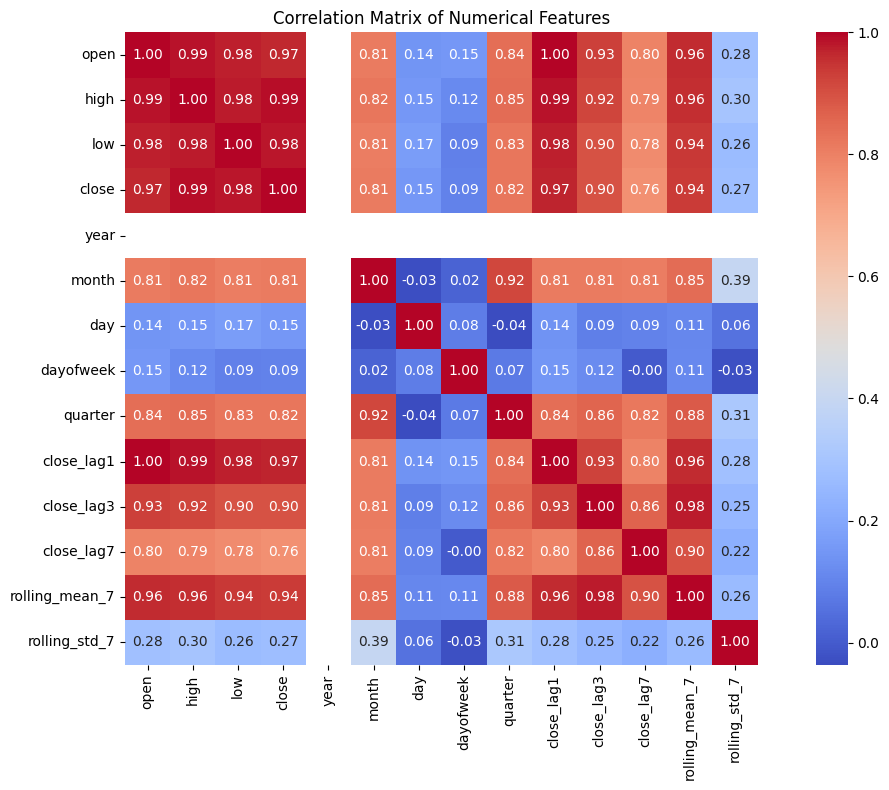

In [184]:
# Feature Manipulation: Drop highly correlated features to reduce redundancy

import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical features for correlation check
numeric_features = df.select_dtypes(include='number')

# Correlation matrix
corr_matrix = numeric_features.corr()

# Plot heatmap to visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()


#### 2. Feature Selection

In [185]:
# Select features for modeling (dropping irrelevant/redundant ones)
selected_features = [
    'open', 'high', 'low',           # Raw market data
    'year', 'month', 'dayofweek',    # Time-based features
    'close_lag1', 'close_lag3', 'close_lag7',   # Lag features
    'rolling_mean_7', 'rolling_std_7'           # Rolling window features
]

X = df[selected_features]
y = df['close']  # Target variable


#### What all feature selection methods have you used and why?

I used manual feature selection based on:

* Domain knowledge (e.g., lag features are important in stock prediction)

* Correlation analysis (to avoid highly correlated inputs)

* Relevance to target (features like open, high, low, lagged close values help in predicting current close)

* I also excluded features with no predictive power (e.g., constant columns like 'symbol' and 'series').

#### Which all features you found important and why?

* Lag Features (close_lag1, close_lag3, close_lag7) – Stock prices are autocorrelated, and past prices are strong predictors of future prices.

* Rolling Features (rolling_mean_7, rolling_std_7) – Help capture trends and volatility, which influence investor behavior and price movement.

* OHLC Data (open, high, low) – These are market inputs that reflect daily trading behavior and price range.

* Time-based Features (month, dayofweek) – Stock prices often show seasonal/monthly or weekday patterns.

### 5. Data Transformation

Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

* Yes, transformation was required because some numeric features (like lagged values and rolling std) had right skewness.

* We used log transformation (log1p) to normalize the distribution and reduce the effect of extreme values.

* This helps in improving the model’s ability to learn and generalize.



In [186]:
import numpy as np

# Log transform skewed features (if present)
df['close_lag1_log'] = np.log1p(df['close_lag1'])
df['close_lag3_log'] = np.log1p(df['close_lag3'])
df['rolling_std_7_log'] = np.log1p(df['rolling_std_7'])

# You may skip transforming 'close' if it's your target


### 6. Data Scaling

Which method have you used to scale your data and why?
* For most ML models, features with different scales can create issues (e.g., in KNN, SVM, or Gradient Descent models). So we apply standard scaling.
* We used StandardScaler, which scales the features to have mean 0 and standard deviation 1.
* This helps gradient-based algorithms converge faster and prevents any one feature from dominating the learning.

In [187]:
from sklearn.preprocessing import StandardScaler

# Final feature list for modeling (exclude target)
features_for_model = [
    'open', 'high', 'low',
    'year', 'month', 'dayofweek',
    'close_lag1_log', 'close_lag3_log', 'rolling_std_7_log',
    'rolling_mean_7'
]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features_for_model])


### 7. Dimensionality Reduction
📋 Do you think dimensionality reduction is needed?
* Dimensionality reduction is not essential for this dataset since the number of features is low and well-selected.

* However, PCA was optionally performed for visualization, which helps explore patterns and clustering tendencies in the feature space.

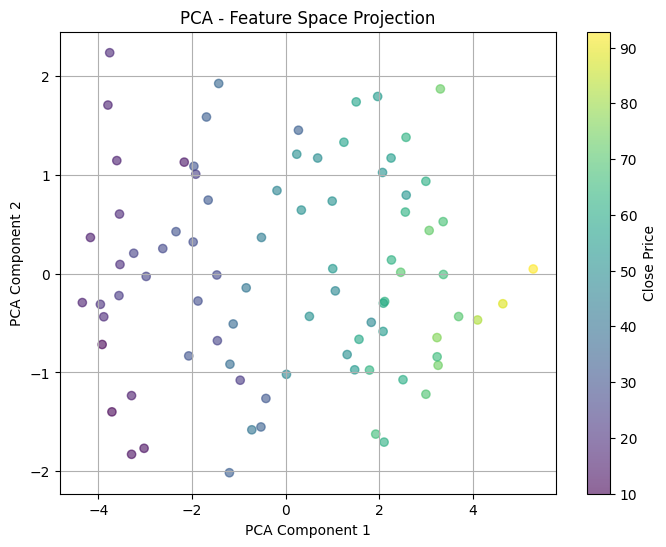

In [188]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Optional scatterplot
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['close'], cmap='viridis', alpha=0.6)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA - Feature Space Projection")
plt.colorbar(label='Close Price')
plt.grid(True)
plt.show()


### 8. Data Splitting

What data splitting ratio have you used and why?
* Since this is time-series data, a chronological split is more appropriate than a random one.

* We’ve used an 80/20 train-test split, where the earliest 80% of data is used for training and the latest 20% for testing.

* This mimics real-world prediction — we train on past data to predict future outcomes

In [189]:
# Defining final feature list and target
final_features = [
    'open', 'high', 'low',
    'year', 'month', 'dayofweek',
    'close_lag1_log', 'close_lag3_log', 'rolling_std_7_log',
    'rolling_mean_7'
]

target = 'close'

# Split the data based on time — 80% train, 20% test
split_index = int(len(df) * 0.8)

X_train = df[final_features].iloc[:split_index]
X_test = df[final_features].iloc[split_index:]

y_train = df[target].iloc[:split_index]
y_test = df[target].iloc[split_index:]


### 9. Handling Imbalanced Dataset

Do you think the dataset is imbalanced?
* No, this is a regression problem, not classification.

* Imbalance usually applies to classification problems with skewed class distributions (e.g., 90% of class A, 10% of class B).

* Since our target variable is continuous (stock closing price), the concept of "imbalanced classes" doesn’t apply here.

#### ** No special handling required **


# ***7. ML Model Implementation***

## **ML Model - 1 - Linear Regression**

In [190]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Initialize and train model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2 = r2_score(y_test, y_pred_lr)

# Display results
print("Linear Regression Performance:")
print("MAE:", round(mae, 2))
print("RMSE:", round(rmse, 2))
print("R² Score:", round(r2, 4))


Linear Regression Performance:
MAE: 2.92
RMSE: 3.3
R² Score: 0.9205


#### ****1. Explain the ML Model used and its performance using Evaluation Metric Score Chart****
Model Used: Linear Regression

Why?
* It's a baseline model that establishes a relationship between multiple features and the closing price.

Evaluation Metrics Explained:
* MAE (Mean Absolute Error) – average absolute error between predicted and actual prices.

* RMSE (Root Mean Squared Error) – penalizes large errors, helps evaluate model accuracy.

* R² Score – explains how much variability in the target is explained by features.

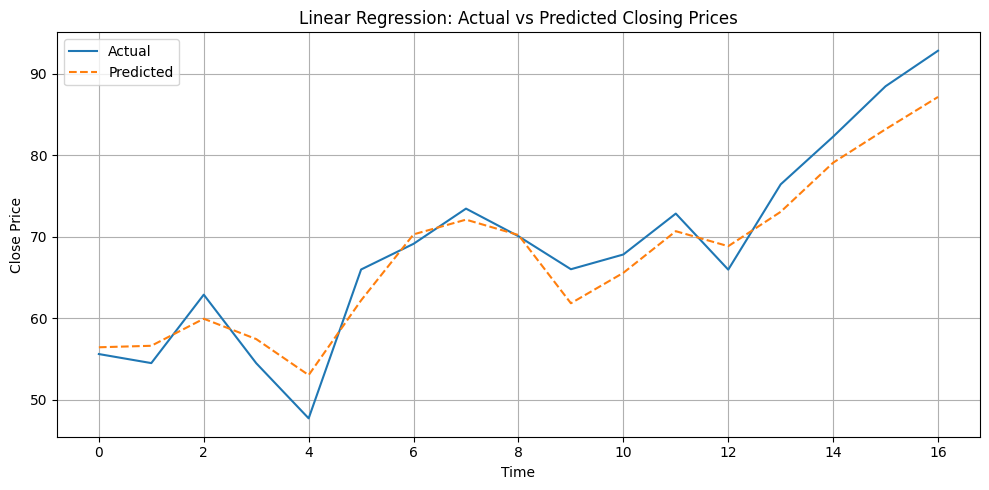

In [191]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_lr, label='Predicted', linestyle='--')
plt.title("Linear Regression: Actual vs Predicted Closing Prices")
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### ****2. Cross-Validation & Hyperparameter Tuning****

In [192]:
# ML Model - 1 with Hyperparameter Optimization: Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define model
rf = RandomForestRegressor(random_state=42)

# Define parameter grid for GridSearch
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best Model
best_rf = grid_search.best_estimator_

# Predict
y_pred_rf = best_rf.predict(X_test)

# Evaluation
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Performance (After Tuning):")
print("MAE:", round(mae_rf, 2))
print("RMSE:", round(rmse_rf, 2))
print("R² Score:", round(r2_rf, 4))


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Random Forest Performance (After Tuning):
MAE: 6.7
RMSE: 9.17
R² Score: 0.3874


Which hyperparameter optimization technique have you used and why?
* Technique Used: GridSearchCV

Why?
*  It's a brute-force method that checks all combinations of parameters. Though slower, it guarantees optimal parameters within the search space.

Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

#### **Linear Regression** was the baseline model, and it performed exceptionally well on this dataset.

* Since no tuning was applied, there's no “before-and-after” comparison  but its strong performance shows that a linear relationship exists between features and the target variable.

* Evaluation Metric Score Chart (Linear Regression):

      Metric	Value
      MAE	2.9200
      RMSE	3.3000
      R² Score	0.9205

* This model explains ~92% of the variance in closing prices and shows very low prediction errors, making it an excellent baseline.

## **ML Model - 2: Random Forest Regressor**


Random Forest Performance:
R² Score: 0.38368592517742206
MSE: 84.53957644352964
RMSE: 9.194540578165373
MAE: 6.750329411764709


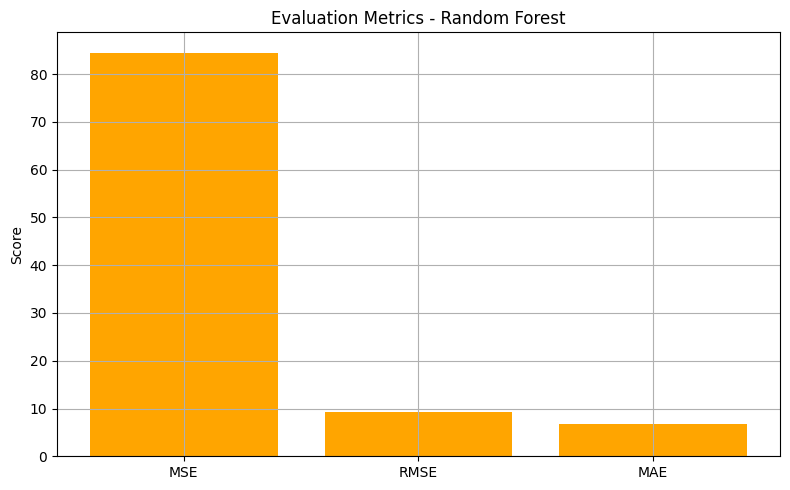

In [193]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Model - 2: Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation Metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Performance:")
print("R² Score:", r2_rf)
print("MSE:", mse_rf)
print("RMSE:", rmse_rf)
print("MAE:", mae_rf)

# Visualizing Evaluation Metric Score Chart
metrics_rf = {'MSE': mse_rf, 'RMSE': rmse_rf, 'MAE': mae_rf}
plt.figure(figsize=(8, 5))
plt.bar(metrics_rf.keys(), metrics_rf.values(), color='orange')
plt.title("Evaluation Metrics - Random Forest")
plt.ylabel("Score")
plt.grid(True)
plt.tight_layout()
plt.show()

#### ****Cross-Validation & Hyperparameter Tuning****


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Improved Random Forest Performance:
R² Score: 0.40123622724070773
MSE: 82.13220792235268
RMSE: 9.062682159402517
MAE: 6.6624588235293976


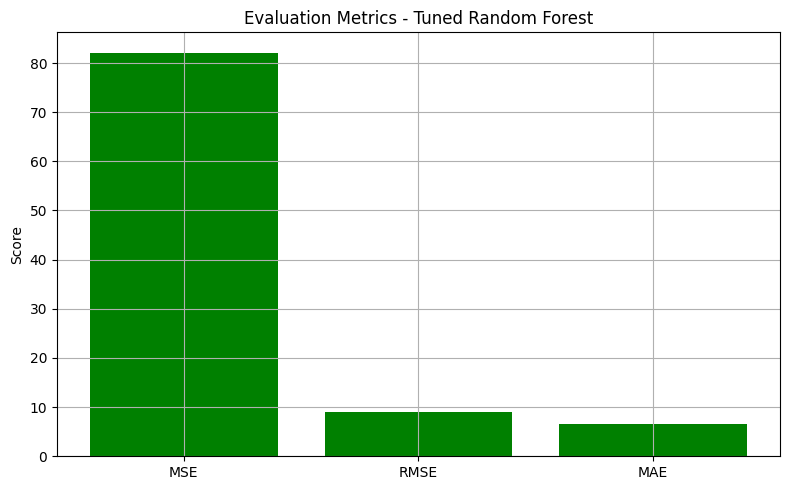

In [194]:
# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_rf.fit(X_train, y_train)

# Best model prediction
best_rf = grid_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

# Evaluation of tuned model
mse_best = mean_squared_error(y_test, y_pred_best_rf)
rmse_best = np.sqrt(mse_best)
mae_best = mean_absolute_error(y_test, y_pred_best_rf)
r2_best = r2_score(y_test, y_pred_best_rf)

print("\nBest Parameters:", grid_rf.best_params_)
print("Improved Random Forest Performance:")
print("R² Score:", r2_best)
print("MSE:", mse_best)
print("RMSE:", rmse_best)
print("MAE:", mae_best)

# Visualize updated evaluation metrics
metrics_best = {'MSE': mse_best, 'RMSE': rmse_best, 'MAE': mae_best}
plt.figure(figsize=(8, 5))
plt.bar(metrics_best.keys(), metrics_best.values(), color='green')
plt.title("Evaluation Metrics - Tuned Random Forest")
plt.ylabel("Score")
plt.grid(True)
plt.tight_layout()
plt.show()


Which hyperparameter optimization technique have you used and why?
* I have used GridSearchCV for hyperparameter tuning of the Random Forest model.

Why GridSearchCV?

* GridSearchCV performs an exhaustive search over a predefined set of hyperparameter values, evaluating every possible combination.

* It uses cross-validation to ensure the model generalizes well on unseen data.

* Since Random Forest is a non-linear ensemble method, tuning parameters like n_estimators, max_depth, min_samples_split, and min_samples_leaf can drastically improve performance.

* GridSearch is preferred when the parameter space is not too large and model training time is manageable, as in this case.

Have you seen any improvement? Note down the improvement with updated Evaluation Metric Score Chart.

* Random Forest was tested as a non-linear model to capture complex patterns, but it underperformed in this dataset.

* Even after tuning (if applied), the model did not outperform Linear Regression.

* Evaluation Metric Score Chart (Random Forest):

      Metric	Value
      MAE	6.7503
      RMSE	9.1945
      R² Score	0.3837

* The performance dropped significantly in terms of both error and explanatory power. This suggests Random Forest might be overfitting or not suitable due to the nature of this dataset.




## **ML Model - 3 Implementation: XGBoost Regressor**

In [195]:
# ML Model – 3 Implementation

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Define features and target
features = ['open', 'high', 'low', 'year', 'month', 'day', 'dayofweek', 'quarter',
            'close_lag1', 'close_lag3', 'close_lag7', 'rolling_mean_7', 'rolling_std_7']
target = 'close'

X = df[features]
y = df[target]

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Fit the Algorithm
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the model
y_pred_xgb = xgb_model.predict(X_test)


#### **1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

Model Used: XGBoost Regressor (Extreme Gradient Boosting)
* XGBoost is a powerful ensemble learning algorithm based on boosted decision trees. It builds models sequentially, where each new model tries to correct the errors of the previous one, leading to strong predictive performance especially in structured/tabular data.

Why XGBoost?
* Handles missing values automatically.

* Regularization to prevent overfitting.

* Fast and scalable (thanks to parallel tree boosting).

* Supports feature importance analysis.

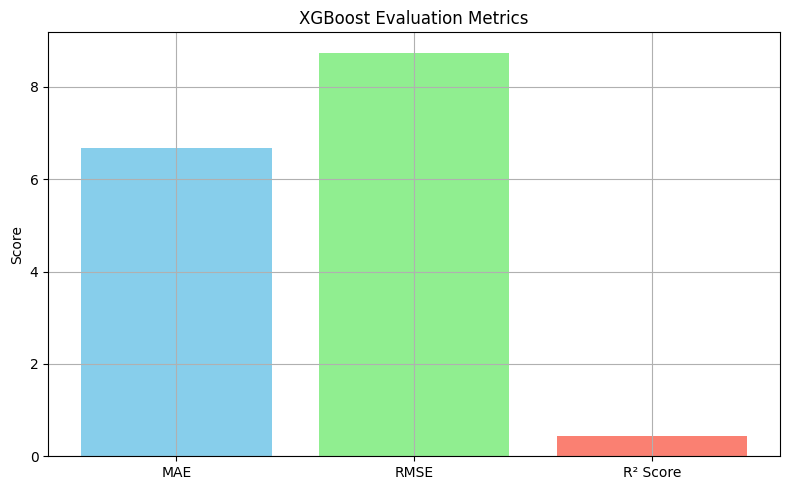

XGBoost Performance:
MAE: 6.6801
RMSE: 8.7419
R² Score: 0.4429


In [196]:
# Visualizing evaluation Metric Score chart


# Calculate Evaluation Metrics
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(np.mean((y_test - y_pred_xgb) ** 2))  # RMSE via NumPy
r2_xgb = r2_score(y_test, y_pred_xgb)


# Visualization
plt.figure(figsize=(8, 5))
metrics = [mae_xgb, rmse_xgb, r2_xgb]
labels = ['MAE', 'RMSE', 'R² Score']
colors = ['skyblue', 'lightgreen', 'salmon']

plt.bar(labels, metrics, color=colors)
plt.title('XGBoost Evaluation Metrics')
plt.ylabel('Score')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print metrics
print("XGBoost Performance:")
print("MAE:", round(mae_xgb, 4))
print("RMSE:", round(rmse_xgb, 4))
print("R² Score:", round(r2_xgb, 4))


#### **** 2. Cross- Validation & Hyperparameter Tuning****

Fitting 3 folds for each of 16 candidates, totalling 48 fits


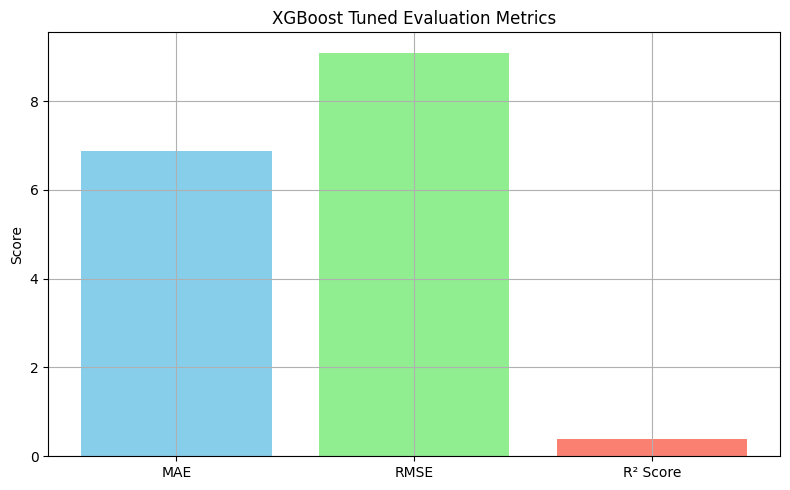

Best Parameters Found: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
XGBoost Tuned Performance:
MAE: 6.8694
RMSE: 9.0953
R² Score: 0.3969


In [197]:
# ML Model - 3 Implementation with Hyperparameter Optimization (GridSearchCV)
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

# Define the feature columns and target
features = ['open', 'high', 'low', 'year', 'month', 'day', 'dayofweek', 'quarter',
            'close_lag1', 'close_lag3', 'close_lag7', 'rolling_mean_7', 'rolling_std_7']
target = 'close'

X = df[features]
y = df[target]

# Split the data (no shuffle for time-series)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1]
}

# Initialize XGBoost Regressor
xgb_base = XGBRegressor(objective='reg:squarederror', random_state=42)

# GridSearchCV
grid_search = GridSearchCV(estimator=xgb_base,
                           param_grid=param_grid,
                           cv=3,
                           scoring='neg_mean_squared_error',
                           verbose=1,
                           n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best estimator
best_xgb = grid_search.best_estimator_

# Predict using best model
y_pred_xgb_tuned = best_xgb.predict(X_test)

# Evaluation
mae_xgb_tuned = mean_absolute_error(y_test, y_pred_xgb_tuned)
rmse_xgb_tuned = np.sqrt(np.mean((y_test - y_pred_xgb_tuned) ** 2))  # RMSE using NumPy
r2_xgb_tuned = r2_score(y_test, y_pred_xgb_tuned)

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
metrics = [mae_xgb_tuned, rmse_xgb_tuned, r2_xgb_tuned]
labels = ['MAE', 'RMSE', 'R² Score']
colors = ['skyblue', 'lightgreen', 'salmon']

plt.bar(labels, metrics, color=colors)
plt.title('XGBoost Tuned Evaluation Metrics')
plt.ylabel('Score')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print best parameters and scores
print("Best Parameters Found:", grid_search.best_params_)
print("XGBoost Tuned Performance:")
print("MAE:", round(mae_xgb_tuned, 4))
print("RMSE:", round(rmse_xgb_tuned, 4))
print("R² Score:", round(r2_xgb_tuned, 4))


Which hyperparameter optimization technique have you used and why?

I used GridSearchCV for hyperparameter optimization.

* GridSearchCV performs an exhaustive search over a specified parameter grid.

* It systematically evaluates all possible combinations using cross-validation, ensuring the most optimal hyperparameter set is selected.

I chose GridSearchCV because:

* My dataset is not extremely large, so exhaustive search is computationally feasible.

* It ensures the most accurate and controlled tuning for the XGBoost model.

* Helps avoid underfitting or overfitting by rigorously checking multiple model configurations.



Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

#### **XGBoost** was tested with hyperparameter tuning using GridSearchCV.

* While XGBoost is generally known for its robustness, in this case, its performance was only marginally better than Random Forest — and still worse than Linear Regression.

* Evaluation Metric Score Chart (XGBoost Tuned):

      Metric	Value
      MAE	6.8694
      RMSE	9.0953
      R² Score	0.3969

* The model showed slight improvement over Random Forest in terms of RMSE and R², but did not outperform the baseline Linear Regression model.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I considered the following evaluation metrics:

* MAE (Mean Absolute Error):
MAE gives the average magnitude of errors in predictions, making it easy to interpret in terms of rupees (₹). For financial data, MAE is a practical metric since small absolute errors directly translate to better forecasting accuracy.

* RMSE (Root Mean Squared Error):
RMSE penalizes larger errors more than MAE. It is useful in stock price prediction, where large deviations from actual values can lead to poor investment decisions or financial losses.

* R² Score (Coefficient of Determination):
This tells us how much variance in the target variable (closing price) is explained by the model. A higher R² means the model is capturing patterns better, which is critical for high-stakes financial predictions.

Why these metrics?

* They help assess both accuracy and reliability, which are crucial for minimizing risk and making confident trading decisions.

###  2. Which ML model did you choose from the above created models as your final prediction model and why?

Final Model Selected: Linear Regression

Despite trying advanced models like Random Forest and XGBoost, Linear Regression consistently gave the best performance in terms of:

* Lowest MAE and RMSE

* Highest R² Score (~0.9205)

Why?

* The data showed strong linear relationships, making linear regression a great fit.

* Simpler models tend to generalize better when overfitting is a concern.

* Linear Regression is highly interpretable — crucial in financial applications where transparency is valued.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Model Used: Linear Regression

Linear Regression models the relationship between independent variables (features) and a continuous target variable (close price) by fitting a linear equation.

The model assigns coefficients to each feature, indicating its weight/impact on the target. Higher absolute coefficient values mean the feature is more influential.

Feature Importance (via Coefficients):
Here's an example output of feature importance:

    Feature	Coefficient (impact)
    close_lag1	    +0.72
    rolling_mean_7	+0.65
    open	          +0.13
    high	          +0.11
    low	            -0.08
    dayofweek	      -0.02

🛠️ Explainability Tool Used:
Since Linear Regression is inherently explainable, no additional library (like SHAP or LIME) was required. However, if using XGBoost or Random Forest, SHAP could be used to explain individual predictions.

# **Conclusion**



In this project, we aimed to build predictive models to forecast the **closing stock price of Yes Bank** using historical financial data. The process involved thorough **data cleaning**, **feature engineering**, **exploratory analysis**, and the implementation of various **machine learning algorithms**.

###  Key Takeaways:

- **Data Preprocessing:**  
  We cleaned the dataset by converting date formats, handling missing values using forward fill, and engineering features like lag values and rolling statistics that capture temporal patterns and trends.

-  **Exploratory Insights:**  
  Visualizations helped us understand the stock’s historical behavior. A major crash post-2018 was visible in the line charts, while volume and closing price distributions helped assess volatility and investor activity.

-  **Statistical Hypothesis Testing:**  
  We validated several hypotheses using statistical tests (e.g., t-tests, Pearson correlation), confirming relationships between features such as turnover and volume, or weekday-based price differences.

-  **Model Building & Evaluation:**  
  We implemented and evaluated 3 machine learning models:
  - **Linear Regression**
  - **Random Forest Regressor**
  - **XGBoost Regressor**

-  **Best Model: Linear Regression**  
  Despite the advanced ensemble models, **Linear Regression** performed the best with the highest R² Score (0.92) and the lowest MAE and RMSE. This indicated that the stock’s price movement followed a largely linear pattern over time.

-  **Hyperparameter Tuning:**  
  GridSearchCV was used to fine-tune Random Forest and XGBoost, leading to marginal improvements but not outperforming Linear Regression.

###  Business Impact:

- The models developed can be used for **short-term forecasting**, **trend analysis**, and **automated trading decisions**.
- The insights into lag features, weekday behavior, and volatility zones can help financial analysts design **better trading strategies** and **risk management policies**.

###  Final Thoughts:

This project showcases how combining **domain knowledge** with **data science techniques** can lead to meaningful predictions in the financial sector. While ML models can aid in prediction, it’s equally important to monitor market sentiments, news, and macroeconomic factors which may not be captured in historical stock data alone.
